## Regularize Regression
---

Regularization is a technique used in an attempt to solve the overfitting problem in statistical models.

the regularization technique comes handy. You penalize your loss function by adding a multiple of an L1 (LASSO) or an L2 (Ridge) norm of your weights vector w (it is the vector of the learned parameters in your linear regression). 

You get the following equation:

    L(X,Y) + λN(w)
                   
                 
(N is either the L1, L2 or any other norm)

This will assure you to avoid overfiting and will perform feature selection for certain regularization norms (the L1 in the LASSO does the job).

Finally you might ask: OK I have everything now. How can I tune in the regularization term λ?

One possible answer is to use Cross-validation: you divide your training data, you train your model for a fixed value of λ and test it on the remaining subsets and repeat this procedure w
hile varying λ. Then you select the best λ that minimizes your loss function.

As discussed above, lasso can set coefficients to zero, while ridge regression, which appears superficially similar, cannot. This is due to the difference in the shape of the constraint boundaries in the two cases. Both lasso and ridge regression can be interpreted as minimizing the same objective function


   $ {\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{N}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}}$

but with respect to different constraints: $ {\displaystyle \|\beta \|_{1}\leq t} {\displaystyle \|\beta \|_{1}\leq t}$ for lasso and $ {\displaystyle \|\beta \|_{2}^{2}\leq t} {\displaystyle \|\beta \|_{2}^{2}\leq t}$ for ridge. From the figure, one can see that the constraint region defined by the $ {\displaystyle \ell ^{1}} $ norm is a square rotated so that its corners lie on the axes (in general a cross-polytope), while the region defined by the ${\displaystyle \ell ^{2}} $norm is a circle (in general an n-sphere), which is rotationally invariant and, therefore, has no corners. As seen in the figure, a convex object that lies tangent to the boundary, such as the line shown, is likely to encounter a corner (or in higher dimensions an edge or higher-dimensional equivalent) of a hypercube, for which some components of $ {\displaystyle \beta } $ are identically zero, while in the case of an n-sphere, the points on the boundary for which some of the components of $ {\displaystyle \beta }  $ are zero are not distinguished from the others and the convex object is no more likely to contact a point at which some components of $ {\displaystyle \beta } $ are zero than one for which none of them are.

https://en.wikipedia.org/wiki/Lasso_(statistics)#/media/File:L1_and_L2_balls.jpg

Lasso and ridge regression are two alternatives – or should I say complements – to ordinary least squares (OLS). They both start with the standard OLS form and add a penalty for model complexity. The only difference between the two methods is the form of the penality term. Ridge regression uses the $\mathbf{\mathit{l}_{2}}-norm$ while lasso regression uses the $\mathbf{\mathit{l}_{1}}-norm$. Specifically the forms are shown below


$ SS_\text{res}=\sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $  The sum of squares of residuals, also called the residual sum of squares

where $ \hat{Y_i} =  (\hat\beta _{0}-\sum _{j=1}^{p}x_{i}^{T}\hat\beta _{j}) $

** Lasso Regression:** 

In statistics and machine learning, lasso (least absolute shrinkage and selection operator) (also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. 


$ \mathbf{\hat{\beta}^{lasso} = \displaystyle arg\min_{\beta}\sum^{n}_{i=1}(y_{i}-\beta _{0}-\sum _{j=1}^{p}x_{i}^{T}\beta _{j} )^2 + \lambda\sum _{j=1}^{p}|\beta _{j}|}$


**Ridge Regression: **

$\mathbf{\hat{\beta}^{ridge} = \displaystyle arg\min_{\beta}\sum^{n}_{i=1}(y_{i}-\beta _{0}-\sum _{j=1}^{p}x_{i}^{T}\beta _{j})^2 + \lambda\sum _{j=1}^{p} |\beta _{j}|_{}^{2}}$


L2 regularization is used in many contexts aside from linear regression, such as classification with logistic regression or support vector machines, and matrix factorization


---


The regularization of the ridge is a shrinkage: the coefficients learned are shrunk towards zero.

The amount of regularization is set via the alpha parameter of the ridge, which is tunable. We'll use the Ridge class to start, but the RidgeCV class in scikits-learn automatically tunes this parameter via cross-validation.

In [36]:
from sklearn.datasets import load_diabetes


from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn import preprocessing


import statsmodels.api as sm
import sklearn.linear_model as LM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



** Dataset : Diabetes **

In [324]:
diabetes = load_diabetes()
X = diabetes.data # Features
X[:2]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405]])

In [325]:
y = diabetes.target # Target
y[:2]

array([ 151.,   75.])

---
Ridge
---

**Ridge Regression: **

$\mathbf{\hat{\beta}^{ridge} = \displaystyle arg\min_{\beta}\sum^{n}_{i=1}(y_{i}-\beta _{0}-\sum _{j=1}^{p}x_{i}^{T}\beta _{j})^2 + \lambda\sum _{j=1}^{p} |\beta _{j}|_{}^{2}}$


L2 regularization is used in many contexts aside from linear regression, such as classification with logistic regression or support vector machines, and matrix factorization


Note for sklearn.linear_model $\alpha$ is $\lambda$ our tuning parameter to be determined!

Fitting with $\alpha = 0.05$ 

In [326]:
alpha = 0.05
modelr = Ridge(alpha)
modelr.fit(X,y) 

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [327]:
modelr.score(X,y)

0.51444313100306849

---


In [328]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

---
Start of considering removing only the code part not the mark down
---

** Varying $\alpha$ **

Plotting the test error and training error curves for Ridge regression with different alpha parameters. 

In [351]:

def ridge_alpha_mse_rmse_betavec_plot(X, X_train, X_test, y_train):

    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)

    k = X.shape[1] # Feature columns qty

    #alphas = np.arange(0,0.05,0.001)
    alphas = np.logspace(-2, 0)

    train_MSE, test_MSE = [], []
    train_RMSE, test_RMSE = [], []


    parameters = np.zeros((len(alphas), k ))

    ridges = [Ridge(alpha= a, normalize=True).fit(X_train_scaled, y_train) for a in alphas]
    coefficients = [ridge.coef_ for ridge in ridges] # Beta coefficient


    train_MSE = [MSE(y_train, ridge.predict(X_train_scaled)) for ridge in ridges]
    test_MSE = [MSE(y_test, ridge.predict(X_test_scaled)) for ridge in ridges]

    train_RMSE = [r2_score(y_train, ridge.predict(X_train_scaled)) for ridge in ridges]
    test_RMSE = [r2_score(y_test, ridge.predict(X_test_scaled)) for ridge in ridges]
    
    # cross_val_train_MSE.append(np.mean(train_MSE))
    # cross_val_test_MSE.append(np.mean(test_MSE))  


    fig = plt.figure(figsize=(14, 10))

    ax1 = fig.add_subplot(311)

    ax1.plot(alphas, coefficients)
    ax1.set_xlabel('alpha')
    ax1.set_ylabel('Coefficient values - Beta vector')
    ax1.set_title('Plot of coefficient values against alpha for the ridge regression model')

    ax2 = fig.add_subplot(312)

    ax2.plot(np.logspace(-2,0), train_MSE, label='Training error')
    ax2.plot(np.logspace(-2,0), test_MSE, label='Test error')
    ax2.set_xlabel('alpha')
    ax2.set_ylabel('MSE - Error')
    ax2.legend(loc='lower right')
    ax2.set_title('MSE vs alpha (Ridge regression)')

    ax3 = fig.add_subplot(313)

    ax3.plot(np.logspace(-2,0), train_RMSE, label='Training error - RMSE')
    ax3.plot(np.logspace(-2,0), test_RMSE, label='Test error - RMSE')
    ax3.set_xlabel('alpha')
    ax3.set_ylabel('RMSE - Error')
    ax3.legend(loc='lower right')
    ax3.set_title('MSE vs alpha (Ridge regression)')
    
    fig.tight_layout() 
    plt.show()
    
    return alphas, train_MSE, test_MSE, train_RMSE, test_RMSE


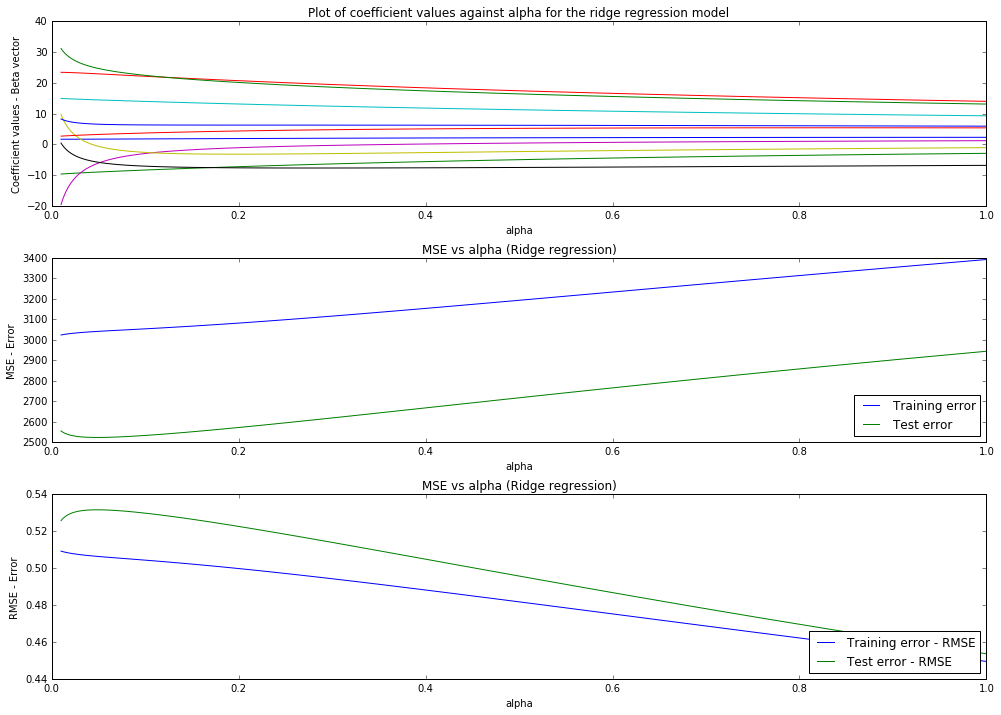

In [352]:
alfa, tra_MSE, tes_MSE, tra_RMSE, tes_RMSE = ridge_alpha_mse_rmse_betavec_plot(X, X_train, X_test, y_train)

** Selectin an $\alpha$ value**

Setting $\alpha = 0.01 $ that minimizes the MSE for Ridge Regression

In [344]:
def ridge_select_best_lambda_tomin_mse_andmax_rmse(train_MSE, test_MSE, test_RMSE):
    best_alpha = alphas[np.argmin(np.array(train_MSE))]
    min_mse = np.array(test_MSE).min()
    beta_vector = coefficients[np.argmin(np.array(train_MSE))]
    max_rmse = np.array(test_RMSE).max()
    
    return best_alpha, min_mse, max_rmse, beta_vector

In [345]:
ridge_select_best_lambda_tomin_mse_andmax_rmse(tra_MSE, tes_MSE, tes_RMSE)

(0.01,
 2524.1196548531721,
 0.53154775138550381,
 array([  1.70312936,  -9.61673175,  23.45022262,  14.96016184,
        -19.53473549,   9.78528043,   0.4398097 ,   8.27565629,
         31.1760901 ,   2.7062532 ]))

In [336]:
new_alpha = 0.01
modelr_1 = Ridge(new_alpha)
modelr_1.fit(X,y) 

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [337]:
modelr_1.score(X,y)

0.51662878403158385

In [338]:
modelr_1.coef_

array([  -7.19945679, -234.55293001,  520.58313622,  320.52335582,
       -380.60706569,  150.48375154,  -78.59123221,  130.31305868,
        592.34958662,   71.1337681 ])

---
Lasso
---


** Lasso Regression:** 

In statistics and machine learning, lasso (least absolute shrinkage and selection operator) (also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. 

$ \mathbf{\hat{\beta}^{lasso} = \displaystyle arg\min_{\beta}\sum^{n}_{i=1}(y_{i}-\beta _{0}-\sum _{j=1}^{p}x_{i}^{T}\beta _{j} )^2 + \lambda\sum _{j=1}^{p}|\beta _{j}|}$


In [346]:
def lasso_alpha_mse_rmse_betavec_plot(X, X_train, X_test, y_train):

    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)

    k = X.shape[1] # Feature columns qty

    #alphas = np.arange(0,0.05,0.001)
    alphas = np.logspace(-2, 0)

    train_MSE, test_MSE = [], []
    train_RMSE, test_RMSE = [], []
    
    #cross_val_train_MSE, cross_val_test_MSE = [], []


    lassos = [Lasso(alpha= a, normalize=True).fit(X_train_scaled, y_train) for a in alphas]
    coefficients = [lasso.coef_ for lasso in lassos] # Beta coefficient


    train_MSE = [MSE(y_train, lasso.predict(X_train_scaled)) for lasso in lassos]
    test_MSE = [MSE(y_test, lasso.predict(X_test_scaled)) for lasso in lassos]

    train_RMSE = [r2_score(y_train, lasso.predict(X_train_scaled)) for lasso in lassos]
    test_RMSE = [r2_score(y_test, lasso.predict(X_test_scaled)) for lasso in lassos]
    
    # cross_val_train_MSE.append(np.mean(train_MSE))
    # cross_val_test_MSE.append(np.mean(test_MSE))  


    fig = plt.figure(figsize=(14, 10))

    ax1 = fig.add_subplot(311)

    ax1.plot(alphas, coefficients)
    ax1.set_xlabel('alpha')
    ax1.set_ylabel('Coefficient values - Beta vector')
    ax1.set_title('Plot of coefficient values against alpha for the ridge regression model')

    ax2 = fig.add_subplot(312)

    ax2.plot(np.logspace(-2,0), train_MSE, label='Training error')
    ax2.plot(np.logspace(-2,0), test_MSE, label='Test error')
    ax2.set_xlabel('alpha')
    ax2.set_ylabel('MSE - Error')
    ax2.legend(loc='lower right')
    ax2.set_title('MSE vs alpha (Lasso regression)')
   
    ax3 = fig.add_subplot(313)

    ax3.plot(np.logspace(-2,0), train_RMSE, label='Training error - RMSE')
    ax3.plot(np.logspace(-2,0), test_RMSE, label='Test error - RMSE')
    ax3.set_xlabel('alpha')
    ax3.set_ylabel('RMSE - Error')
    ax3.legend(loc='lower right')
    ax3.set_title('MSE vs alpha (Lasso regression)')
    
    fig.tight_layout() 
    plt.show()
    
    return alphas, train_MSE, test_MSE, train_RMSE, test_RMSE



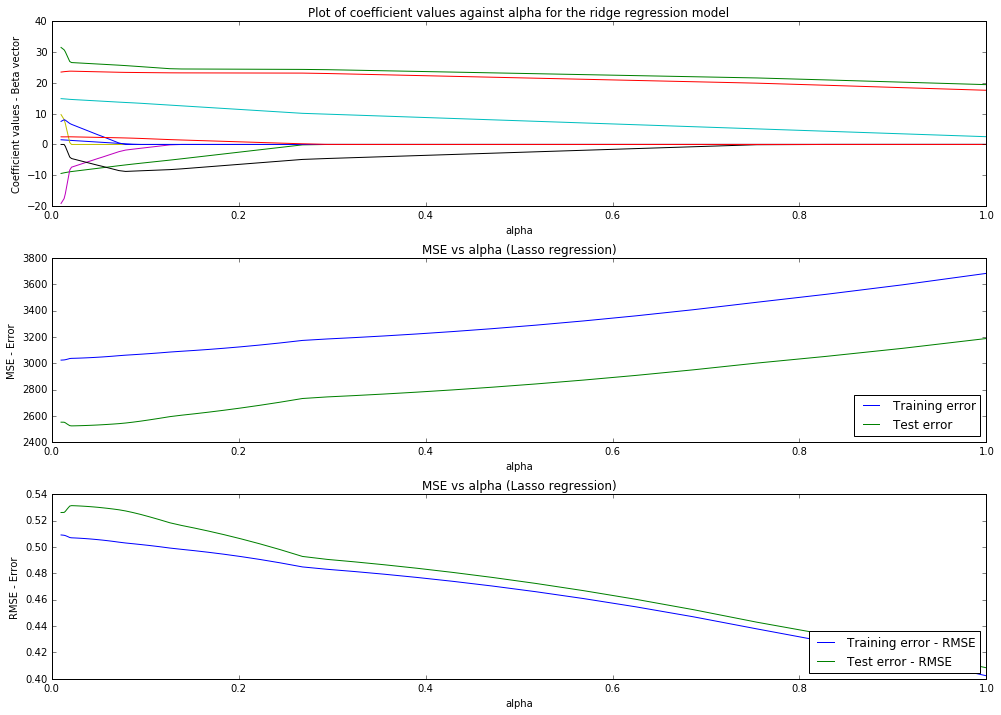

In [347]:
alfa_l, tra_MSE_l, tes_MSE_l, tra_RMSE_l, tes_RMSE_l = lasso_alpha_mse_rmse_betavec_plot(X, X_train, X_test, y_train)

In [348]:
def lasso_select_best_lambda_tomin_mse_andmax_rmse(train_MSE, test_MSE, test_RMSE):
    best_alpha = alphas[np.argmin(np.array(train_MSE))]
    min_mse = np.array(test_MSE).min()
    beta_vector = coefficients[np.argmin(np.array(train_MSE))]
    max_rmse = np.array(test_RMSE).max()
    
    return best_alpha, min_mse, max_rmse, beta_vector

In [349]:
lasso_select_best_lambda_tomin_mse_andmax_rmse(tra_MSE_l, tes_MSE_l, tes_RMSE_l)

(0.01,
 2525.2799542672651,
 0.53133241101185991,
 array([  1.70312936,  -9.61673175,  23.45022262,  14.96016184,
        -19.53473549,   9.78528043,   0.4398097 ,   8.27565629,
         31.1760901 ,   2.7062532 ]))

In [354]:
model_l = Lasso(new_alpha)
model_l.fit(X, y)
model_l.score(X, y)

0.51617305384565193

**Conclusion:** Lasso give us lower MSE and a larger RMSE = R^2, therefore for this excersice Lasso is the best performance. 


Note: Lasso and Ridge both considerably out-perfomed OLS Regression.

---